# Symbolic equilibrium example

In [1]:
R0 = 6.2 * u.m

<Quantity 6.2 m>

In [59]:

NSTX_PARAMS = dict(
    #     R0 = 0.8 * u.m,
    #     a0 = 0.64 * u.m,
    triangularity=0.3,
    elongation=1.7,
    aspect_ratio=0.3,
    A=-0.144,
)

{'triangularity': 0.3, 'elongation': 1.7, 'aspect_ratio': 0.3, 'A': -0.144}

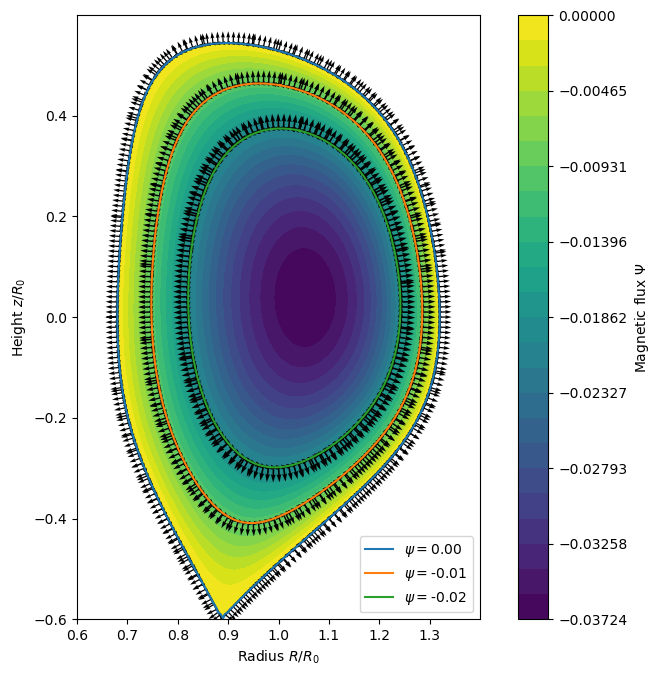

In [79]:
import plasmaboundaries

from plasmapy.plasma.symbolicequilibrium import SymbolicEquilibrium

params = plasmaboundaries.ITER.copy()
# params = NSTX_PARAMS
assert params["triangularity"] <= 0.841  # for convex plasma surfaces
eq = SymbolicEquilibrium(**params, B0=5.3, config="single-null")
ax = eq.plot((0.6, 1.4, 0.001), (-0.6, 0.6, 0.001), vmax=-0)
for psi_value in [0, -0.01, -0.02]:
    fs = eq.get_flux_surface(psi_value)
    fs.plot(ax, B=True, n=True)

## On a grid

In [80]:
R, Z, psi = eq.get_grid_and_psi(
    rminmaxstep=(0.6, 1.4, 0.01), zminmaxstep=(-0.6, 0.6, 0.01)
)

ρ = psi / psi.min()
ρprime_r = np.gradient(ρ, R[0], axis=1)
ρprime_z = np.gradient(ρ, Z[:, 0], axis=0)
ρprime2 = ρprime_z ** 2 + ρprime_r ** 2
from scipy import interpolate

interpolator = interpolate.RectBivariateSpline(Z[:, 0], R[0], ρprime2)
interpolated_values = interpolator(fs.Z, fs.R, grid=False)

array([ 8.81691414,  8.74671999,  8.3177391 ,  7.91611998,  7.54248677,
        7.19852433,  6.88685487,  6.61091943,  6.37486309,  6.34432033,
        6.18084022,  6.0364909 ,  5.95784781,  5.94767709,  5.91885625,
        5.93003762,  5.9588533 ,  6.04587423,  6.07517394,  6.23999283,
        6.27641222,  6.48145069,  6.57245681,  6.75363859,  6.9736767 ,
        7.04652513,  7.34885605,  7.4910687 ,  7.65689251,  7.96587459,
        8.13463416,  8.27225392,  8.57191029,  8.86624777,  8.91143499,
        9.14782712,  9.41901917,  9.67910238,  9.8211972 ,  9.92486945,
       10.15486615, 10.37062041, 10.57138681, 10.75657768, 10.83621543,
       10.92441265, 11.07499366, 11.20927972, 11.32716363, 11.42863118,
       11.51375279, 11.5826757 , 11.63561655, 11.67285432, 11.69472322,
       11.70160583, 11.69392591, 11.67214132, 11.63673652, 11.58821493,
       11.52709105, 11.45388223, 11.36910026, 11.27324273, 11.16678429,
       11.05016796, 10.92379652, 10.78802443, 10.68407824, 10.64

In [81]:
x, y = eq._model_surface()

In [82]:
x, y

(0.32*cos(τ + 0.33630357515398*sin(τ)) + 1, 0.544*sin(τ))

In [83]:
import sympy

In [84]:
tau = x.free_symbols.pop()

τ

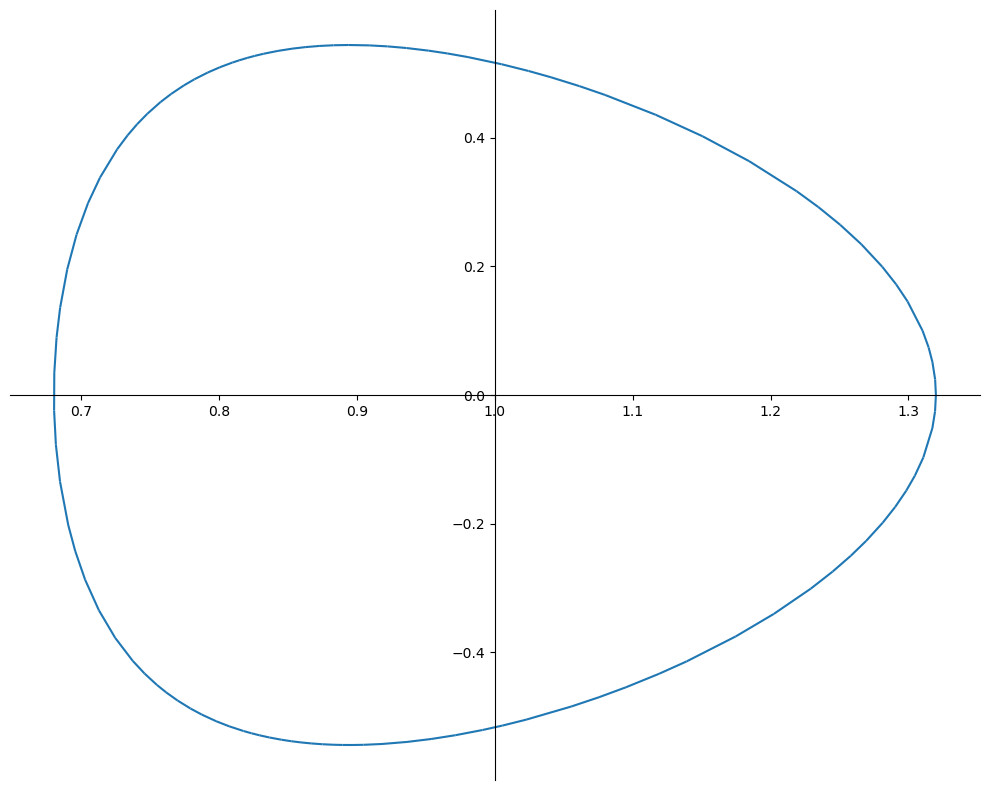

In [85]:
sympy.plot_parametric(
    x,
    y,
    (tau, 0, 2 * sympy.pi)
)

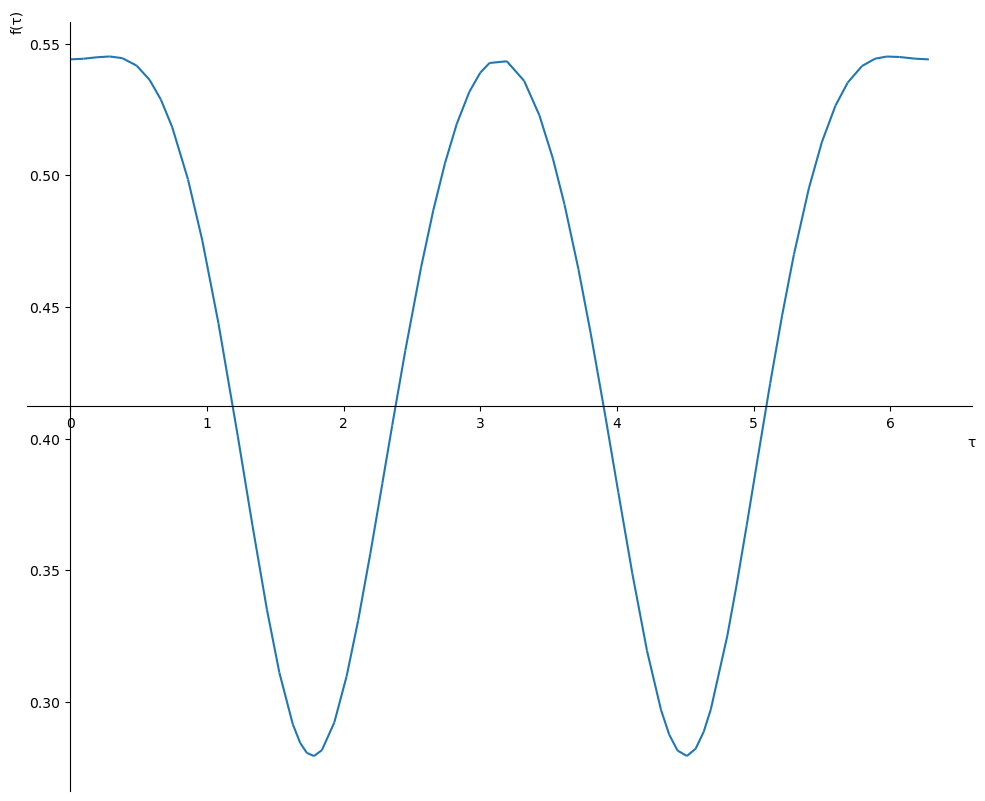

In [86]:
sympy.plot(
    sympy.sqrt(x.diff(tau)**2 + y.diff(tau)**2),
    (tau, 0, 2 * sympy.pi)
)

In [87]:
sympy.integrate(
    sympy.sqrt(x.diff(tau)**2 + y.diff(tau)**2),
    (tau, 0, 2 * sympy.pi)
)

0.544*Integral(sqrt(0.0391349808516778*sin(τ + 0.33630357515398*sin(τ))**2*cos(τ)**2 + 0.232736038168845*sin(τ + 0.33630357515398*sin(τ))**2*cos(τ) + 0.346020761245675*sin(τ + 0.33630357515398*sin(τ))**2 + 1.0*cos(τ)**2), (τ, 0, 2*pi))

In [88]:
_.evalf()

2.76999308660965

In [89]:
r = sympy.symbols("r")

r

In [91]:
jacobian = r

r

In [116]:
xr, yr = eq._model_surface(parametric_r = True)
xr, yr

(0.544*r*sin(τ) + 1, 0.544*r*sin(τ))

In [117]:
tau, r = xr.free_symbols
tau

τ

In [120]:
jacobian = r

r

In [122]:
integrand = jacobian * xr

r*(0.544*r*sin(τ) + 1)

1.1736225065222459

In [125]:
sympy.integrate(integrand, (tau, 0, 2 * sympy.pi), (r, 0, 1))

1.0*pi

In [28]:
plot = sympy.plot_parametric((x, y), (tau, 0, 2 * sympy.pi), show = False)

In [35]:
xp, yp = plot[0].get_points()

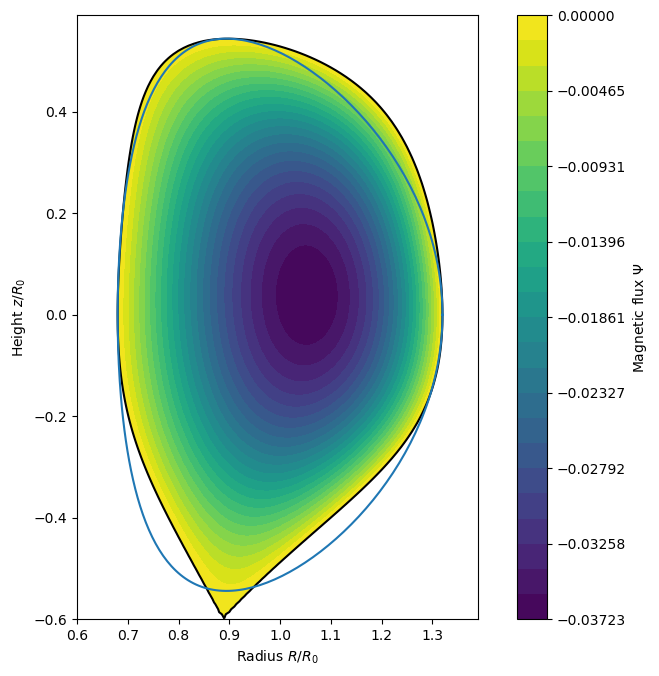

In [36]:
ax = eq.plot()
ax.plot(xp, yp)

NameError: name 'bools' is not defined

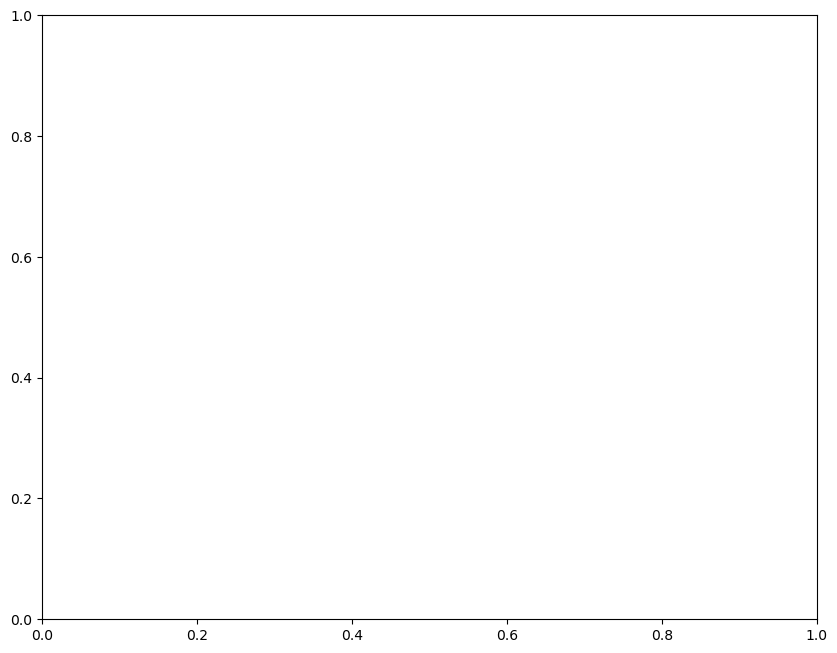

In [5]:
# levels = np.sort(np.linspace(PSI.min(), 0, num=25))
fig, ax = plt.subplots()
CS = ax.contourf(
    R, Z, ρprime2, levels=100, vmin=ρprime2[bools].min(), vmax=ρprime2[bools].max()
)
ax.scatter(fs.R, fs.Z, c=fs.GradRho2)
ax.contour(R, Z, psi, levels=[0], colors="black")  # display the separatrix

plt.colorbar(CS, label=r"Magnetic flux $\Psi$")
ax.set_xlabel("Radius $R/R_0$")
ax.set_ylabel("Height $z/R_0$")
ax.set_aspect("equal")

In [ ]:
Ri, Zi = np.meshgrid(np.arange(R.shape[0]), np.arange(R.shape[1]))

In [ ]:
from matplotlib import path

p = path.Path(np.vstack((fs.R, fs.Z)).T)
flags = p.contains_points(gridpoints)
bools = flags.reshape(R.shape)

In [ ]:
integrand = ((eq.A + (1 - eq.A) * R ** 2) / R) * bools

In [ ]:
ϵ = 1 / params["aspect_ratio"]

In [ ]:
plt.plot(np.sqrt(1 + np.gradient(fs.Z, fs.R) ** 2))
plt.axvline(1 - ϵ)
plt.axvline(1 + ϵ)

In [ ]:
trapezoid(trapezoid(integrand, R, axis=1), Z[:, 0])

In [ ]:
bools.shape

In [ ]:
import numba
import numpy as np

from numba import jit, njit


@jit(nopython=True)
def pointinpolygon(x, y, poly):
    n = len(poly)
    inside = False
    p2x = 0.0
    p2y = 0.0
    xints = 0.0
    p1x, p1y = poly[0]
    for i in numba.prange(n + 1):
        p2x, p2y = poly[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xints = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside


@njit(parallel=True)
def parallelpointinpolygon(points, polygon):
    D = np.empty(len(points), dtype=numba.boolean)
    for i in numba.prange(0, len(D)):
        D[i] = pointinpolygon(points[i, 0], points[i, 1], polygon)
    return D

In [ ]:
R[Ri.ravel()[flags], Zi.ravel()[flags]]

In [ ]:
levels = np.linspace(-0.03556, 0, 50)
surfaces = list(eq.get_multiple_flux_surfaces(levels))

# ax = eq.plot()
gradPhi = []
rightmost = []
ax = None
for fs in surfaces:
    ax = fs.plot(ax, legend=False)
    gradPhi.append(trapezoid(fs.Bphivals, fs.lp))
    rightmost.append(fs.R.max())

In [ ]:
trapezoid(gradPhi, rightmost)

In [ ]:
plt.plot(rightmost, gradPhi)

In [ ]:
plt.plot(fs.theta)

In [ ]:
def dot_products():
    for fs in surfaces:
        dthetadR = np.gradient(fs.theta, fs.R)
        dthetadZ = np.gradient(fs.theta, fs.Z)
        dot_product = fs.Brvals * dthetadR + fs.Bzvals * dthetadZ
        yield fs.flux_surface_average(dot_product)


plt.plot(levels, list(dot_products()))

## One particular surface

In [ ]:
ax = eq.plot()
fs = eq.get_flux_surface(-0.01)
fs.plot(ax, n=True);

In [ ]:
fs.trapped_fraction()